> 시계열 분석을 정리하고자 한다.

# AR Model

AR(Autoregressive) 모델은 시계열 데이터의 현재 값이 이전의 여러 시점의 값들에 의존하여 결정된다고 가정하는 시계열 모델이다.

AR 모델은 시계열의 현재 값이 과거의 자신의 값들과의 선형 조합으로 표현한다.

## AR(p)

$AR(p)$:

$$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$$

$$\Phi_p(L)Y_t = c + \epsilon_t$$

- 자기 상관성: AR 모델은 시계열 데이터의 자기 상관성을 모델링한다. 즉, 현재의 값이 과거의 값들과 어떻게 연관되어 있는지를 분석한다.

- 정상성(Stationarity): AR 모델을 적용하기 위해서는 시계열 데이터가 정상 시계열이어야 한다. 즉, 시계열의 평균과 분산이 시간에 따라 일정해야 하며, 공분산이 두 시점 간의 간격에만 의존해야 한다. 비정상 시계열은 차분(differencing)과 같은 방법으로 정상화할 수 있다.

- 모델 선택: AR 모델의 차수 $p$는 중요한 선택 요소이다. 너무 낮은 차수는 데이터의 구조를 충분히 설명하지 못할 수 있고, 너무 높은 차수는 과적합(overfitting)을 초래할 수 있다. AIC(Akaike Information Criterion)나 BIC(Bayesian Information Criterion) 같은 정보 기준을 사용하여 최적의 차수를 결정할 수 있다.

const    0.087009
y.L1     0.989062
y.L2    -0.041930
dtype: float64


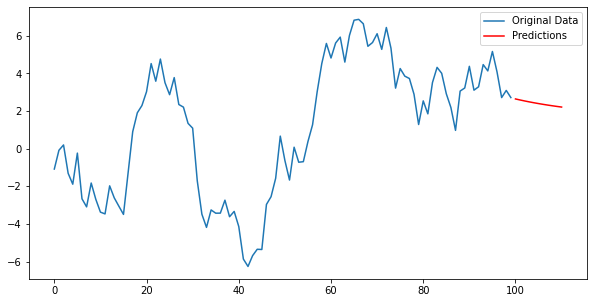

In [38]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# 임의의 시계열 데이터 생성
np.random.seed(123)
data = pd.Series(np.random.randn(100).cumsum())

# AR 모델 적합 (여기서는 차수 p=2로 설정)
model = AutoReg(data, lags=2)
model_fitted = model.fit()

# 모델 파라미터 출력
print(model_fitted.params)

# 예측
predictions = model_fitted.predict(start=len(data), end=len(data)+10)

plt.figure(figsize=(10,5))
plt.plot(data, label='Original Data')
plt.plot(np.arange(len(data), len(data)+11), predictions, label='Predictions', color='red')
plt.legend()
plt.show()

## AR(1)

$X_{t} = c + {\phi}X_{t-1} + \epsilon_{t}$

AR(1) 모형의 정상성 조건은 다음과 같음을 확인할 수 있다.

$ |\phi|<1$

만약 이 조건이 지켜지지 않는 경우 AR(1) 회귀식으로부터, 시계열의 값이 시간에 대해 점차 증가하거나 감소하는 추세를 가지게 될 것임을 예측할 수 있다.

$E[X_{t}] = \frac{c}{1-\phi}$

$Var[X_{t}] = \frac{\sigma^{2}}{1-\phi^{2}}$

$Cov[X_{t}, X_{t-k}] = \frac{\phi^{k}}{1-\phi^{2}}\sigma^{2}$

AR(1)의 ACF는 $\phi^k$ (단, 정상 시계열일때)

AR(1)의 PACF는 $\phi$ (단, k>1이면 0)

# MA Model

MA(Moving Average) 모델은 시계열 분석에서 사용되는 또 다른 중요한 모델이다. 이 모델은 시계열 데이터의 현재 값이 과거의 예측 오차들의 선형 조합으로 표현될 수 있다고 가정한다. MA 모델은 시계열의 불규칙적인 변동(잡음)을 모델링하는 데 특히 유용하다.

$MA(q)$:

$$Y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}$$

- 과거의 예측 오차: MA 모델은 현재의 값이 과거의 예측 오차들에 의해 영향을 받는다고 가정한다. 이는 AR 모델과 대비되는 부분으로, AR 모델은 과거의 값들에 의해 현재 값이 결정된다고 보는 것이다.
- 잡음의 필터링: MA 모델은 시계열 데이터에서 잡음을 분리해내는 필터 역할을 할 수 있다. 이는 시계열 데이터의 중요한 구조적 정보를 추출하는 데 도움을 준다.
- 차수의 결정: MA 모델의 차수 $q$는 중요한 선택 요소다. 차수가 너무 낮으면 데이터의 구조를 충분히 설명하지 못할 수 있고, 너무 높으면 모델이 과적합될 위험이 있다.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -195.819
Date:                Mon, 08 Apr 2024   AIC                            399.638
Time:                        20:48:15   BIC                            410.059
Sample:                             0   HQIC                           403.856
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1174      0.473      2.364      0.018       0.191       2.044
ma.L1          1.1379      0.117      9.749      0.000       0.909       1.367
ma.L2          0.5044      0.112      4.496      0.0

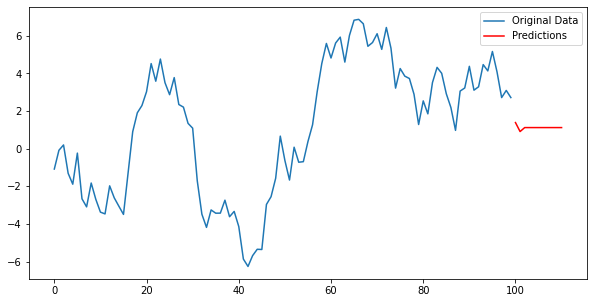

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# MA 모델 적합 (여기서는 차수 q=2로 설정)
model = ARIMA(data, order=(0, 0, 2))  # ARIMA 모델에서 AR 부분을 0으로 설정하여 순수한 MA 모델을 생성
model_fitted = model.fit()

# 모델 파라미터 출력
print(model_fitted.summary())

# 예측
predictions = model_fitted.predict(start=len(data), end=len(data)+10)

plt.figure(figsize=(10,5))
plt.plot(data, label='Original Data')
plt.plot(np.arange(len(data), len(data)+11), predictions, label='Predictions', color='red')
plt.legend()
plt.show()

## MA(1)

$X_{t} = c + \epsilon_{t} + \theta \epsilon_{t-1}$

$E[X_{t}] = c$

$Var[X_{t}] = (1+\theta^{2})\sigma^{2}$

$Cov(X_{t},X_{t-1}) = \theta\sigma^{2}$

$Cov(X_{t},X_{t-k}) = 0$ for k > 1

MA(1) process는 추가적인 가정이 없이도 약정상성을 만족

# ARMA Model

ARMA(Autoregressive Moving Average)은 자기 회귀(AR) 모델과 이동 평균(MA) 모델을 결합한 형태다. ARMA 모델은 시계열 데이터의 자기 상관성과 불규칙적인 변동을 모두 캡처할 수 있기 때문에, 비교적 복잡한 시계열 데이터를 모델링할 때 널리 사용된다.

$ARMA(p,q)$:

$$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}$$

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -151.885
Date:                Mon, 08 Apr 2024   AIC                            315.770
Time:                        20:48:17   BIC                            331.401
Sample:                             0   HQIC                           322.096
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0747      1.132      0.950      0.342      -1.144       3.293
ar.L1          1.8616      0.142     13.153      0.000       1.584       2.139
ar.L2         -0.8772      0.130     -6.733      0.0

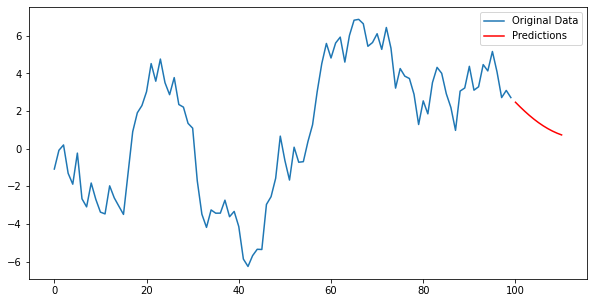

In [40]:
# ARMA 모델 적합 (여기서는 AR 차수 p=2, MA 차수 q=2로 설정)
model = ARIMA(data, order=(2, 0, 2))
model_fitted = model.fit()

# 모델 요약 출력
print(model_fitted.summary())

# 예측
predictions = model_fitted.predict(start=len(data), end=len(data)+10)

plt.figure(figsize=(10,5))
plt.plot(data, label='Original Data')
plt.plot(np.arange(len(data), len(data)+11), predictions, label='Predictions', color='red')
plt.legend()
plt.show()

# ARIMA Model

ARIMA(Autoregressive Integrated Moving Average)는 시계열 데이터의 비정상성을 처리하기 위해 고안된 모델이다. ARIMA는 ARMA 모델을 확장한 것으로, ARMA가 정상 시계열에만 적용 가능한 반면, ARIMA는 비정상 시계열 데이터에도 적용할 수 있다는 장점이 있다.

- 비정상 시계열 데이터 적용 가능: 차분을 통해 비정상 시계열을 정상 시계열로 변환한 후, ARMA 모델을 적용한다.
- 예측력: ARIMA 모델은 미래 값의 예측에 자주 사용되며, 금융, 경제, 사회 과학 등 다양한 분야에서 활용된다.
- 모델 차수의 결정: AIC, BIC와 같은 정보 기준을 사용하여 최적의 $p,d,q$ 값을 결정한다.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -151.508
Date:                Mon, 08 Apr 2024   AIC                            309.015
Time:                        20:48:18   BIC                            316.801
Sample:                             0   HQIC                           312.165
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7645      0.287     -2.661      0.008      -1.328      -0.201
ma.L1          0.8560      0.242      3.544      0.000       0.383       1.329
sigma2         1.2488      0.211      5.930      0.0

C:\Users\master\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


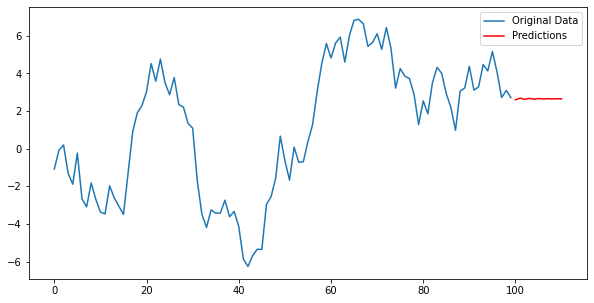

In [41]:
# ARIMA 모델 적합 (여기서는 p=1, d=1, q=1로 설정)
model = ARIMA(data, order=(1, 1, 1))
model_fitted = model.fit()

# 모델 요약 정보 출력
print(model_fitted.summary())

# 예측
predictions = model_fitted.predict(start=len(data), end=len(data)+10, typ='levels')

plt.figure(figsize=(10,5))
plt.plot(data, label='Original Data')
plt.plot(np.arange(len(data), len(data)+11), predictions, label='Predictions', color='red')
plt.legend()
plt.show()

# 차수 결정

## ACF, PACF

ACF, PACF에 대해서는 전 포스트에서 다루었다.

- AR 모델의 차수 결정: PACF를 살펴보아 $p$ 이후에 급격히 떨어지는 지점을 찾는다. 이 지점이 AR 모델의 추정 차수가 될 수 있다.
- MA 모델의 차수 결정: ACF를 살펴보아 $q$ 이후에 급격히 떨어지는 지점을 찾는다. 이 지점이 MA 모델의 추정 차수가 될 수 있다.
- ARIMA 모델의 차수 결정: 차분 $d$를 적용한 후에도 비정상적인 패턴이 관찰되면, ACF와 PACF를 다시 살펴보아 AR 부분과 MA 부분의 차수를 결정한다.

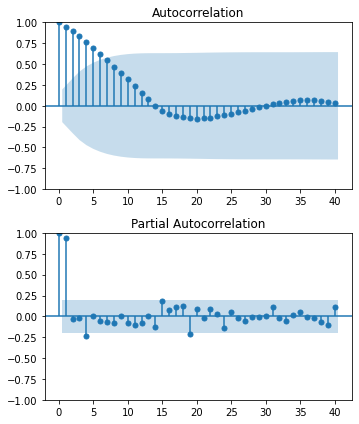

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF 플롯
plt.figure(figsize=(5, 6))
plot_acf(data, lags=40, ax=plt.subplot(2, 1, 1))

# PACF 플롯
plot_pacf(data, lags=40, ax=plt.subplot(2, 1, 2))

plt.tight_layout()
plt.show()

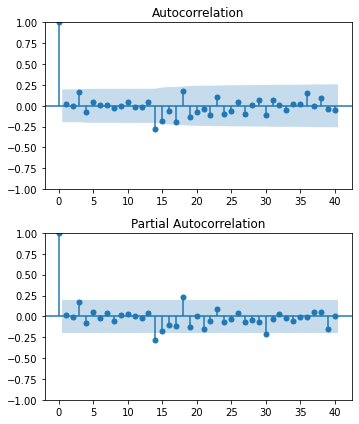

In [52]:
diff = data.diff(1).dropna()

# ACF 플롯
plt.figure(figsize=(5, 6))
plot_acf(diff, lags=40, ax=plt.subplot(2, 1, 1))

# PACF 플롯
plot_pacf(diff, lags=40, ax=plt.subplot(2, 1, 2))

plt.tight_layout()
plt.show()

## AIC, BIC

AIC (Akaike Information Criterion)와 BIC (Bayesian Information Criterion)는 시계열 모델 선택에서 모델의 적합도와 복잡성 사이의 균형을 평가하는 데 널리 사용된다. 자세한 설명은 생략한다.

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# 모델 적합
model = ARIMA(data, order=(1, 1, 1))
model_fitted = model.fit()

# AIC와 BIC 출력
print(f"AIC: {model_fitted.aic}")
print(f"BIC: {model_fitted.bic}")

# 모델 적합
model = ARIMA(data, order=(3, 1, 1))
model_fitted = model.fit()

# AIC와 BIC 출력
print(f"AIC: {model_fitted.aic}")
print(f"BIC: {model_fitted.bic}")

AIC: 309.0152096770903
BIC: 316.80056922749407
AIC: 310.78416238617626
BIC: 323.7597616368492


## Auto ARIMA

auto_arima 함수는 주어진 시계열 데이터에 대해 최적의 ARIMA 모델을 자동으로 찾는다!

In [46]:
import pmdarima as pm

# auto_arima 실행
model = pm.auto_arima(data, start_p=2, start_q=2,
                      test='adf',       # ADF 검정을 사용하여 차분 결정
                      max_p=5, max_q=5, # 최대 p와 q 값
                      m=1,              # 계절성 주기, 여기서는 비계절성 시계열이므로 1
                      d=None,           # 차분 차수, None이면 자동 결정
                      seasonal=False,   # 계절성 모델 사용 여부
                      start_P=1, 
                      D=None, 
                      trace=True,       # 검색 과정의 정보를 출력
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)    # 단계별 검색 사용

# 요약 정보 출력
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=308.858, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=310.834, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=310.833, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=306.972, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=312.834, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.485 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -152.486
Date:                Mon, 08 Apr 2024   AIC                            306.972
Time:                        20:49:26   BIC                            309.567
Sample:                             0   HQIC                           308.022
                    

# ARIMA의 한계점

- **비선형성**: ARIMA 모델은 선형 관계를 가정한다. 많은 실제 시계열 데이터는 비선형 패턴을 보이기 때문에, 이러한 비선형 패턴을 효과적으로 모델링하지 못할 수 있다.

- 계절성: 계절 ARIMA(Seasonal ARIMA) 모델은 계절성을 다루기 위해 개발되었지만, 계절성이 복잡하거나 비정기적인 시계열 데이터를 처리하는 데는 한계가 있다.

- 정상성: ARIMA 모델은 시계열 데이터가 정상성을 가정한다. 비정상 시계열 데이터는 차분 등의 방법으로 정상 시계열로 변환할 수 있지만, 이 과정에서 정보가 손실될 수 있으며, 모든 비정상 시계열이 적절히 정상화되는 것은 아니다. 또한, 차분을 통해 얻어진 시계열 데이터의 해석이 원본 데이터의 해석과 다를 수 있다.

- 모델 선택과 과적합의 위험: 적절한 ARIMA 모델을 선택하기 위해서는 $p,d,q$의 적절한 차수를 결정해야 한다. 모델 차수를 결정하는 과정에서 과적합(overfitting)이 발생할 수 있으며, 이는 모델의 예측 성능을 저하시킬 수 있다. AIC, BIC와 같은 기준을 사용하여 모델을 선택할 수 있지만, 이러한 기준만으로 최적의 모델을 항상 보장하지는 않는다.

- 동적 변화에 대한 제한적 대응: ARIMA 모델은 시계열 데이터의 고정된 패턴을 기반으로 예측을 수행한다. 시계열 데이터의 구조가 시간에 따라 변하는 경우(예: 금융 시장의 급변동), ARIMA 모델은 이러한 동적 변화에 효과적으로 대응하기 어려울 수 있다.

## 머신러닝, 딥러닝

머신러닝과 딥러닝 기반의 시계열 모델은 전통적인 통계 기반 모델링 방법의 한계를 극복하고, 비선형성, 복잡한 패턴 인식, 대규모 데이터 처리 등에서 뛰어난 성능을 보인다. 이러한 모델들은 다양한 분야에서 시계열 데이터의 예측, 분류, 패턴 인식 등에 활용된다.

- Random Forest, Boosting, SVM
- RNN, LSTM, Transformer 등